In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import missingno as msno
import seaborn as sns
import gc
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../input/song-popularity-prediction/train.csv').drop('id', axis=1)
test  = pd.read_csv('../input/song-popularity-prediction/test.csv').drop('id', axis=1)
ss    = pd.read_csv('../input/song-popularity-prediction/sample_submission.csv')

In [3]:
train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,212990.000000,0.642286,0.856520,0.707073,0.002001,10.000000,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,NaN,0.054866,0.733289,0.835545,0.000996,8.000000,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,193213.000000,NaN,0.188387,0.783524,-0.002694,5.000000,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,249893.000000,0.488660,0.585234,0.552685,0.000608,0.000000,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,165969.000000,0.493017,NaN,0.740982,0.002033,10.000000,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [4]:
test.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,308523.000000,0.019845,NaN,0.908939,0.001438,NaN,0.112832,-8.890172,0,0.082714,126.129304,4,0.399620
1,200011.000000,0.070119,0.731256,0.444655,0.002020,10.000000,0.139040,-6.301214,0,0.061685,86.448149,3,0.499424
2,279758.000000,0.810637,0.568858,0.125466,0.898841,0.000000,0.226614,-11.542478,0,0.041868,99.544351,3,0.564951
3,249197.000000,NaN,0.871789,0.557342,0.000715,4.000000,0.325391,-7.905546,1,0.046815,123.063854,4,0.906485
4,NaN,0.765568,0.624687,0.710794,0.000346,8.000000,0.308284,NaN,0,0.129284,88.703121,3,0.935571


In [5]:
train.shape, test.shape

((40000, 14), (10000, 13))

Let's check for missing values

<AxesSubplot:>

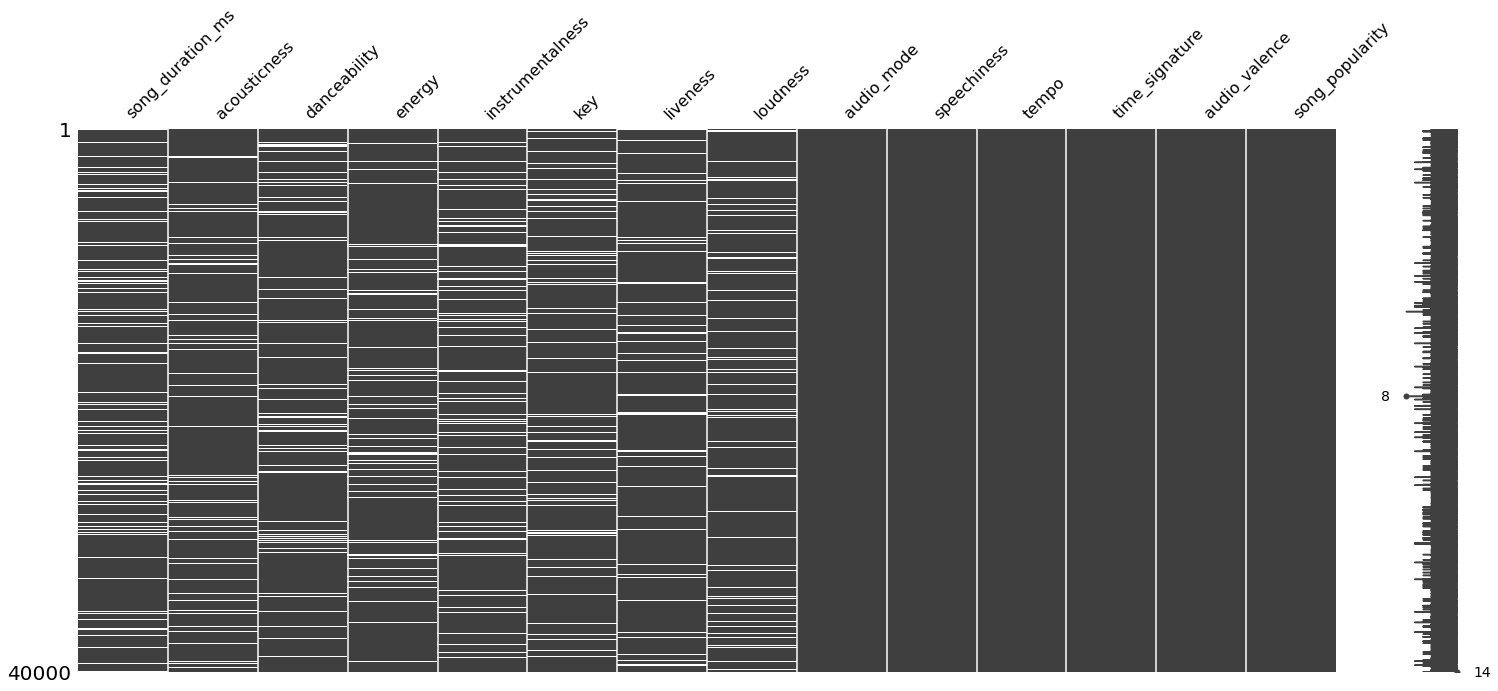

In [6]:
msno.matrix(train)

In [7]:
train.isnull().mean() * 100

song_duration_ms   10.252500
acousticness        9.980000
danceability       10.065000
energy              9.937500
instrumentalness    9.962500
key                10.162500
liveness           10.215000
loudness            9.892500
audio_mode          0.000000
speechiness         0.000000
tempo               0.000000
time_signature      0.000000
audio_valence       0.000000
song_popularity     0.000000
dtype: float64

<AxesSubplot:>

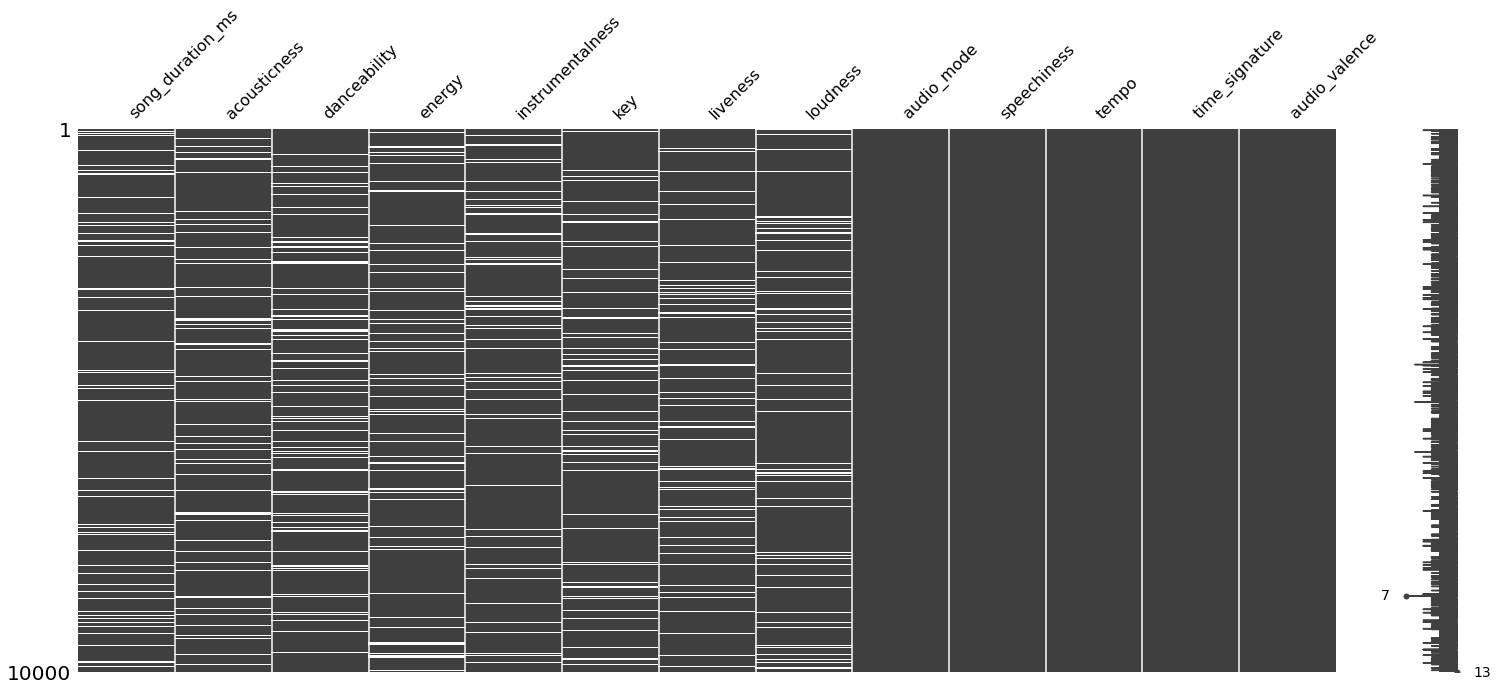

In [8]:
msno.matrix(test)

In [9]:
test.isnull().mean() * 100

song_duration_ms    9.570000
acousticness        9.500000
danceability        9.760000
energy             10.550000
instrumentalness   10.000000
key                 9.920000
liveness           10.060000
loudness           10.260000
audio_mode          0.000000
speechiness         0.000000
tempo               0.000000
time_signature      0.000000
audio_valence       0.000000
dtype: float64

In [10]:
train.loc[:, 'song_duration_ms':'audio_valence'].describe().T.style.bar(subset=['mean'], color='#206ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
song_duration_ms,35899.000000,193165.847572,45822.127679,25658.000000,166254.500000,186660.000000,215116.000000,491671.000000
acousticness,36008.000000,0.276404,0.297928,-0.013551,0.039618,0.140532,0.482499,1.065284
danceability,35974.000000,0.570951,0.190010,0.043961,0.424760,0.608234,0.718464,0.957131
energy,36025.000000,0.683932,0.212662,-0.001682,0.539276,0.704453,0.870503,1.039741
instrumentalness,36015.000000,0.036527,0.150024,-0.004398,0.000941,0.001974,0.003225,1.075415
key,35935.000000,5.042605,3.372728,0.000000,2.000000,5.000000,8.000000,11.000000
liveness,35914.000000,0.198514,0.151670,0.027843,0.111796,0.135945,0.212842,1.065298
loudness,36043.000000,-7.407596,3.877198,-32.117911,-9.578139,-6.345413,-4.620711,-0.877346
audio_mode,40000.000000,0.321150,0.466924,0.000000,0.000000,0.000000,1.000000,1.000000
speechiness,40000.000000,0.094107,0.083591,0.015065,0.038500,0.055881,0.118842,0.560748


Let's check the distribution on target in training data

<AxesSubplot:xlabel='song_popularity', ylabel='count'>

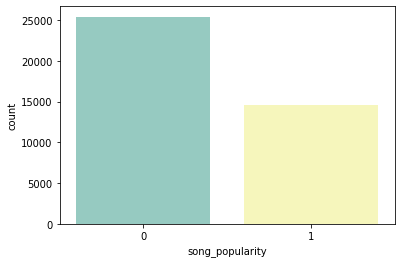

In [11]:
sns.countplot(train['song_popularity'], palette='Set3')

# Density plots of features

<Figure size 432x288 with 0 Axes>

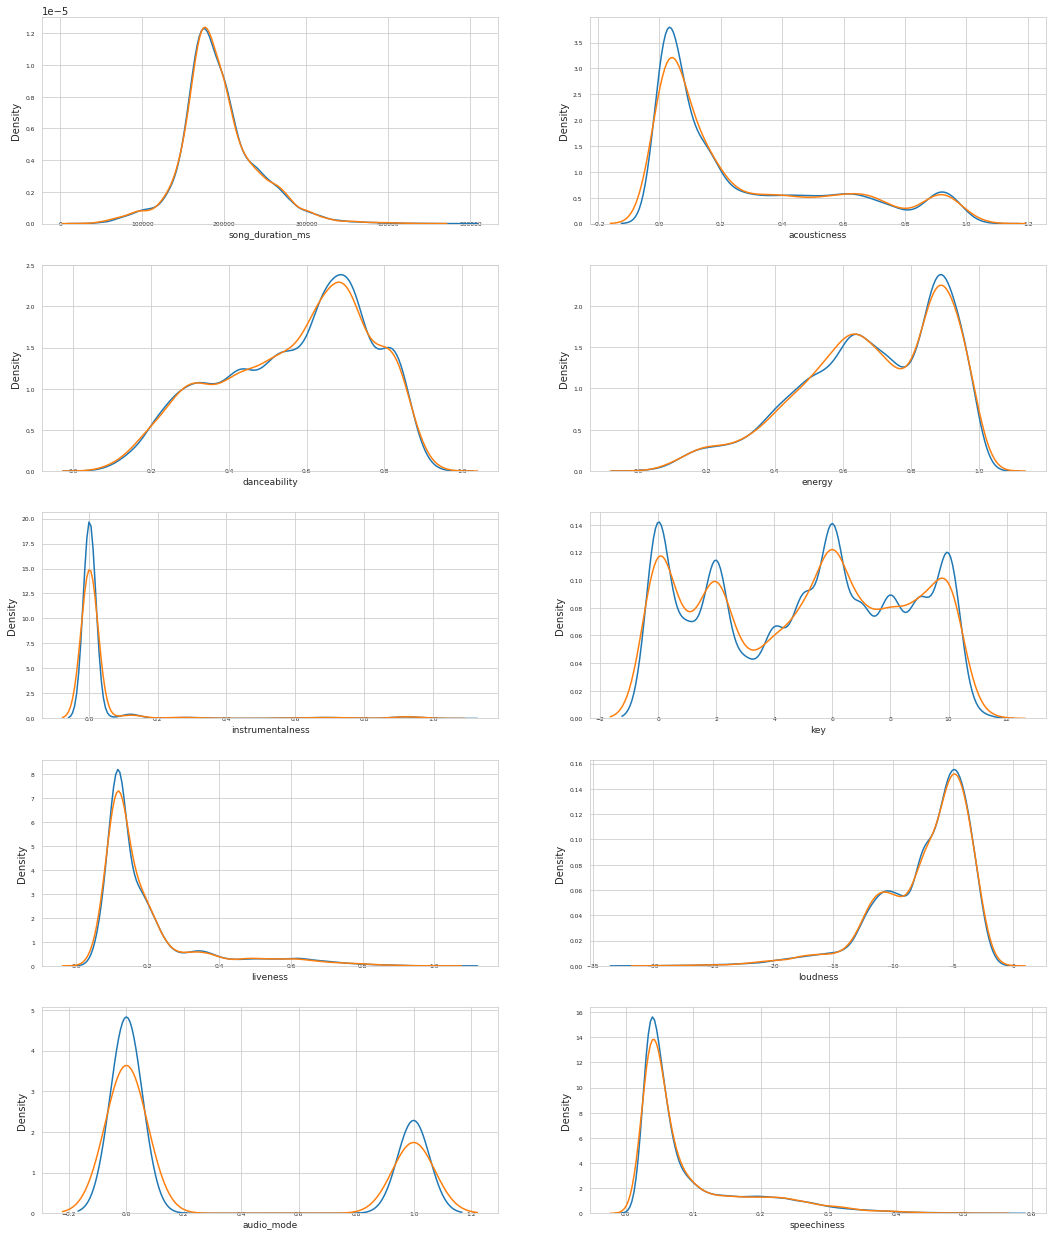

In [12]:
features = train.columns.values[0:10]
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(10,10,figsize=(18,22))

for feature in features:
    i += 1
    plt.subplot(5,2,i)
    sns.distplot(train[feature], hist=False,label='train')
    sns.distplot(test[feature], hist=False,label='test')
    plt.xlabel(feature, fontsize=9)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
    plt.tick_params(axis='y', which='major', labelsize=6)
plt.show();

<Figure size 432x288 with 0 Axes>

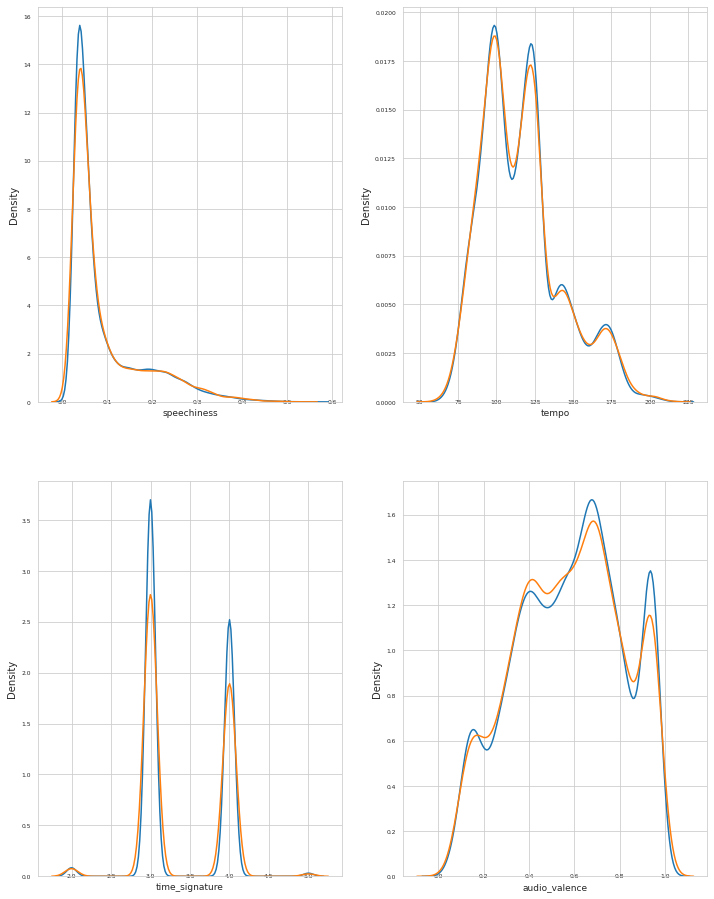

In [13]:
features = train.columns.values[9:13]
i = 0
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(10,10,figsize=(12,16))

for feature in features:
    i += 1
    plt.subplot(2,2,i)
    sns.distplot(train[feature], hist=False,label='train')
    sns.distplot(test[feature], hist=False,label='test')
    plt.xlabel(feature, fontsize=9)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
    plt.tick_params(axis='y', which='major', labelsize=6)
plt.show();

# Distribution of mean and std
This is the distribution of the mean values per row in the train and test set.

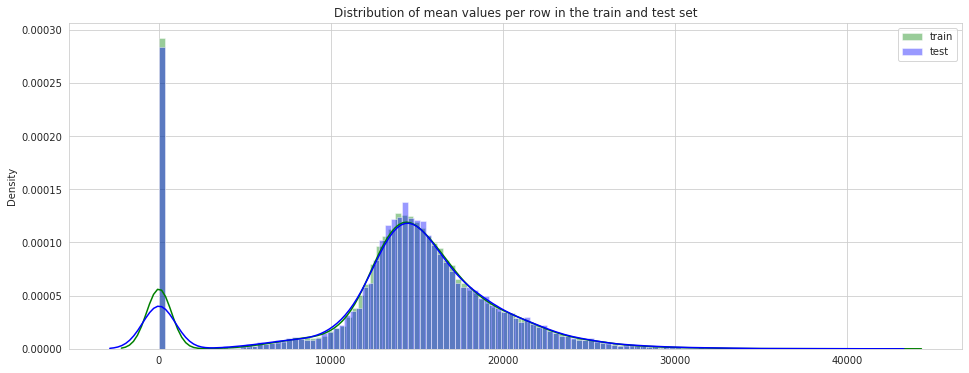

In [14]:
plt.figure(figsize=(16,6))
features = train.columns.values[0:13]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

Distribution of standard deviation of values per row for train and test datasets.

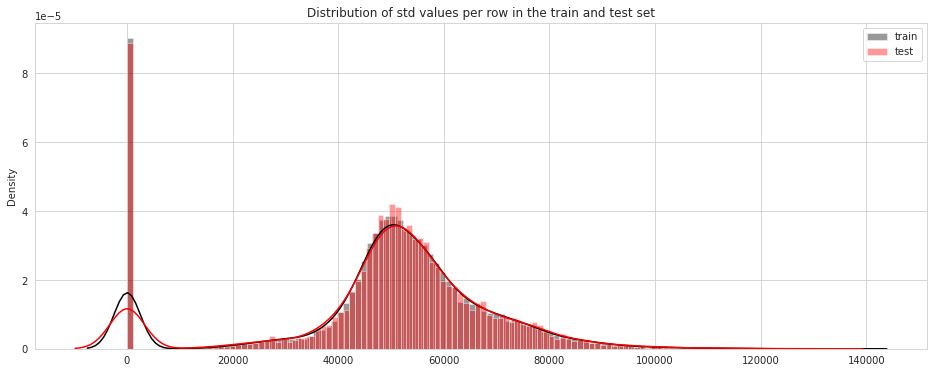

In [15]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# Heatmap of correlation matrix

<AxesSubplot:>

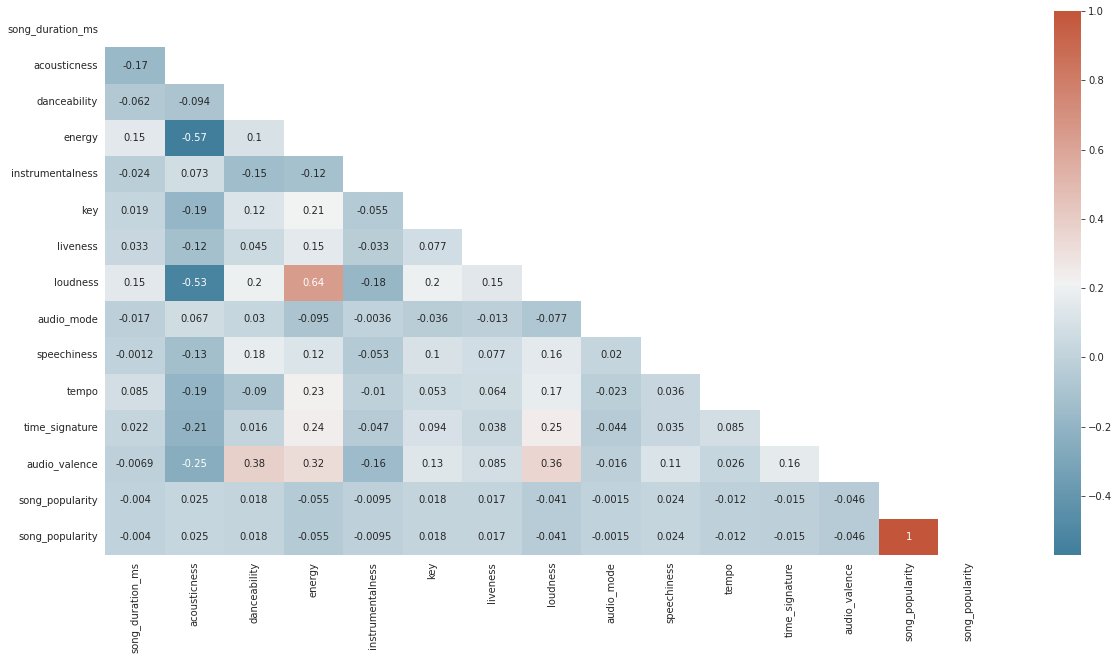

In [16]:
columns = train.columns[0:14].to_list()
columns.append('song_popularity')

corr = train[columns].corr()
f, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# Feature Engineering

In [17]:
X = train.drop('song_popularity', axis=1).copy()
y = train['song_popularity'].copy()
X_test = test.copy()

del train
gc.collect()
del test
gc.collect()

0

Here I am capturing NaN per row and making new feature

In [18]:
def feature_engineering(df):
    df['NaN_row'] = df.isna().sum(axis=1)
    df['std'] = df.std(axis=1)
    return df

X = feature_engineering(X)
X_test = feature_engineering(X_test)

In [19]:
X.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,NaN_row,std
0,212990.000000,0.642286,0.856520,0.707073,0.002001,10.000000,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,1,59068.866047
1,NaN,0.054866,0.733289,0.835545,0.000996,8.000000,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1,28.391721
2,193213.000000,NaN,0.188387,0.783524,-0.002694,5.000000,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,1,53583.406352
3,249893.000000,0.488660,0.585234,0.552685,0.000608,0.000000,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0,66784.131345
4,165969.000000,0.493017,NaN,0.740982,0.002033,10.000000,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,1,46028.378818


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

X = pd.DataFrame(columns=X.columns, data=pipeline.fit_transform(X))
X_test = pd.DataFrame(columns=X_test.columns, data=pipeline.fit_transform(X_test))

In [21]:
X.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,NaN_row,std
0,0.456682,1.294390,1.584803,0.114664,-0.242534,1.550777,-0.000000,0.485958,-0.687808,-0.138019,1.598291,1.154896,0.648823,0.227218,0.570798
1,-0.000000,-0.783746,0.900914,0.751243,-0.249599,0.925135,1.655486,0.589785,1.453895,0.397799,-0.527746,-0.752053,0.551451,0.227218,-2.369403
2,0.001086,-0.000000,-2.123089,0.493477,-0.275518,-0.013328,-0.194938,0.667279,-0.687808,-0.500360,2.374043,-0.752053,-0.653509,0.227218,0.297623
3,1.306804,0.750905,0.079262,-0.650330,-0.252322,-1.577433,-0.721638,-0.132078,-0.687808,-0.699715,0.464423,-0.752053,-0.535282,-0.936065,0.955016
4,-0.626525,0.766319,0.000000,0.282681,-0.242311,1.550777,-0.721040,1.283428,-0.687808,-0.518729,0.205038,1.154896,0.676921,0.227218,-0.078615


# Model training & prediction

In [22]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

In [23]:
params = {  'objective': 'binary', 
            'n_estimators': 25000,
            'max_depth': 7,
            'learning_rate':  0.005, 
            'min_child_weight': 256,
            'min_child_samples': 15,
            'reg_alpha': 10, 
            'reg_lambda': 0.1, 
            'subsample': 0.6, 
            'subsample_freq': 1, 
            'colsample_bytree': 0.4,}

In [24]:
%%time
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

preds = []
scores = []
feature_importance_df = pd.DataFrame()

for fold, (idx_train, idx_valid) in enumerate(kf.split(X, y)):
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]
    
    model = LGBMClassifier(**params)
    
    model.fit(X_train, y_train,
              eval_set = [(X_valid, y_valid)],
              verbose = False,
              early_stopping_rounds = 600)
    
    pred_valid = model.predict_proba(X_valid)[:,1]
    fpr, tpr, _ = roc_curve(y_valid, pred_valid)
    score = auc(fpr, tpr)
    scores.append(score)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = X.columns
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    print(f"Fold: {fold + 1} Score: {score}" "\n")
    print('||'*40, "\n")
    
    test_preds = model.predict_proba(X_test)[:,1]
    preds.append(test_preds)
    
print(f"Overall Validation Score: {np.mean(scores)}")

Fold: 1 Score: 0.5796937830603934

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 2 Score: 0.5708371939497202

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 3 Score: 0.5719143430321734

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 4 Score: 0.5799088890034441

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 5 Score: 0.575866728400458

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 6 Score: 0.5878870098935955

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 7 Score: 0.577581945672105

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 8 Score: 0.5794056287834881

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 9 Score: 0.5724219936345123

|||||||||||||||||||||||

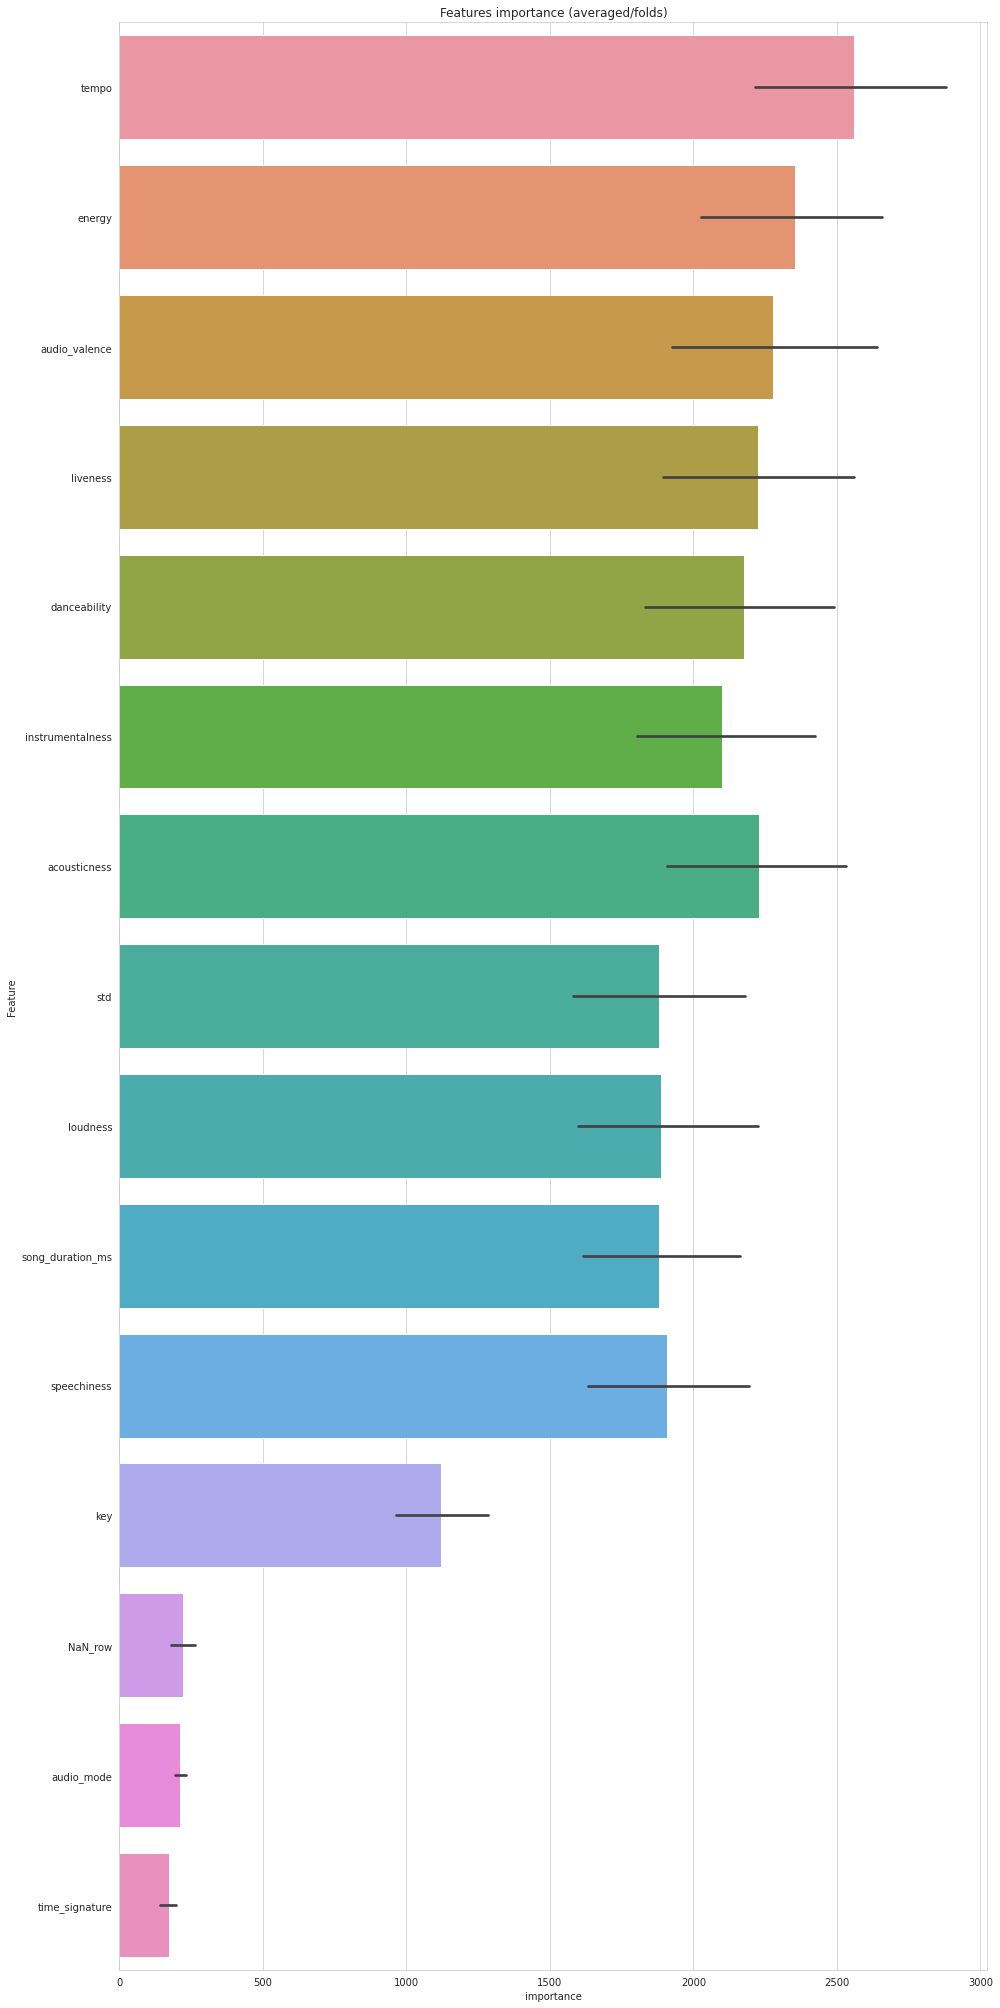

In [25]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:107].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [26]:
predictions = np.mean(np.column_stack(preds),axis=1)

ss['song_popularity'] = predictions
ss.to_csv('lgbm_starter.csv', index=False)
ss.head()

,id,song_popularity
0,0,0.417068
1,1,0.476372
2,2,0.298838
3,3,0.297457
4,4,0.367656
